In [2]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions, ColorSchemes

In [3]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [4]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

In [ ]:
n_coarse_grid = 21
n_plt_grid = 101

coarse_grids = grid(domain, n_coarse_grid)
plt_grids = grid(domain, n_plt_grid)
hm_grid = grid(domain[1, :], n_plt_grid)

plot_size = (400, 400) .* 1
using Plots.Measures
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, size=plot_size, grid=false, ticks=false, margins=-2mm, cb=:none);

In [44]:
ops = gaussian_operators_2D(0.035, coarse_grids)

Operators(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(408.1632653061224, 441, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]), 441, Core.Box(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(#= circular reference @-2 =#))), var"#Φ#32"(Core.Box(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(408.1632653061224, 441, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]), 441, Core.Box(#= circular reference @-2 =

## Spurious spikes for degenerate pre-certificate

In [45]:
function add_noise(y0, noise_level, seed=1)
    Random.seed!(seed)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

add_noise (generic function with 2 methods)

In [60]:
x0 = [[0.461, 0.539], [0.5, 0.5]]
a0 = [1.0, -1.0]

μ0 = DiscreteMeasure(x0, a0)

y0 = ops.Φ(μ0...)

ηV = build_ηV(μ0, ops)

compute_η_max(ηV, coarse_grids)

([0.6141116169145854, 0.4999999999999999], 1.1878499752700697)

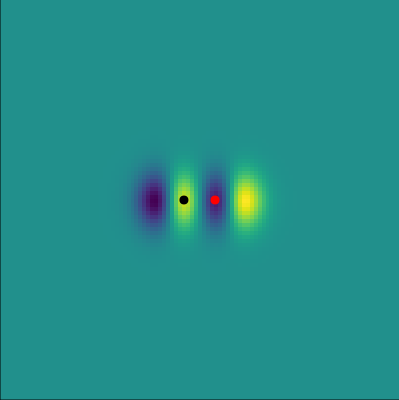

In [ ]:
plt_cert = deepcopy(plt)

heatmap!(plt_cert, hm_grid, hm_grid, ηV(plt_grids), color=:viridis)
plot_spikes!(plt_cert, μ0, colorscheme=get_cmap(:red_black))

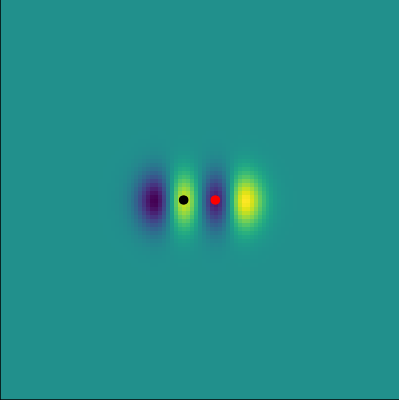

In [63]:
λ = 0.01

prob = BLASSO(y0, ops, domain, n_coarse_grid, λ=λ)
solve!(prob, :SFW, options=Dict(:maxits => 6))

plt_spurious = deepcopy(plt_cert)

plot_spikes!(plt_spurious, prob.μ, colorscheme=get_cmap(:red_black))

In [66]:
prob.y = add_noise(y0, 0.1)
prob.λ = 0.01
solve!(prob, :SFW, options=Dict(:maxits => 10))

SFW iterations:  6    Time: 0:00:00

BLASSO([0.0004161800284896003, 0.0018708511698795624, -0.004003863237820203, 0.000313545081058566, 0.0072963958082278525, -0.010594312976788629, 0.0011822940535297847, 0.0058152474187829015, -0.01875032854180835, -0.01271410056994057  …  0.0008079304626303925, -0.010176683086092386, 0.010748305891913534, 0.013448700019127669, 0.004093031821324787, -0.0031119691105430725, 0.0031873974483410607, -0.0015505242475560219, -0.005972146749293923, 0.006531878584510515], Operators(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(408.1632653061224, 441, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]), 441, Core.Box(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(#= circular reference @-2

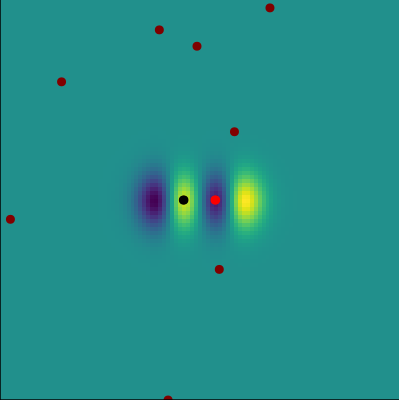

In [67]:
plt_spurious_ns = deepcopy(plt_cert)
plot_spikes!(plt_spurious_ns, prob.μ, colorscheme=get_cmap(:red_black))

In [ ]:
# savefig(plt_spurious, "../../figures/pre_certificates/spurious.svg")
# savefig(plt_spurious_ns, "../../figures/pre_certificates/spurious_noise.svg")